In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [9]:
import seaborn as sn
import statsmodels.api as sm

### Data loading

In [10]:
# df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [11]:
# df_raw.keys()

In [12]:
# dfaa = df_raw['Allgemeine Angaben']
# dfin = df_raw['Infrastruktur']
# dfbe = df_raw['Bedingungen']
# dfop = df_raw['Objekte und Personen']
# dfb1 = df_raw['Beteiligungen 1']
# dfb2 = df_raw['Beteiligungen 2']

In [13]:
# dfaa = dfaa.rename(columns = {'Nr.':'No', 
#                               'Unfall-Nr.':'Nr',
#                               'Unfalltyp \nGruppe':'atgroup_number',
#                               'Unnamed: 5': 'atgroup', # accident type group
#                               'Unfalltyp':'at_number',
#                               'Unnamed: 7':'at', # accident type
#                               'G*':'G',
#                               'SV*':'SV',
#                               'LV*':'LV',
#                               'Sach-\nschaden**':'pd', # property damage
#                               'Hauptursache':'mc', # main cause
#                               'Koord E':'koorde',
#                               'Koord N':'koordn'})

In [14]:
# dfaa = dfaa.drop(['Bemerkung'], axis = 1)

In [15]:
# dfin = dfin.rename(columns = {'Nr.':'No', 
#                               'Unfall-Nr.':'Nr',
#                               'Unfallstelle':'asite', # accident site
#                               'Inner-/ausserorts': 'inout', # in/out of town
#                               'Vortrittsregelung':'rop', # right of way/regulation of priority
#                               'Strassenart':'rt', # road type 
#                               'Höchst-geschwindigkeit':'maxspeed', # maximum of speed
#                               'Strassen-beleuchtung':'sl'}) # road lighting
# dfin = dfin.drop(['Bemerkung'], axis = 1)

In [16]:
# dfbe = dfbe.rename(columns = {'Nr.':'No', 
#                               'Unfall-Nr.':'Nr',
#                               'Witterung':'weatherc', # weather condition
#                               'Lichtverhältnis': 'lightc', # light condition
#                               'Strassenzustand':'roadc', # road condition
#                               'Verkehrsaufkommen':'trafficv'# traffic volume
#                              })
# dfbe = dfbe.drop(['Bemerkung'], axis = 1)

In [17]:
# dfop = dfop.rename(columns = {'Nr.':'No', 
#                               'Unfall-Nr.':'Nr',
#                               'Objekt-Nr.':'object',  
#                               'Fahrzeugart':'vt', # vehicle type
#                               'Blutalkohol-konzent. (‰)': 'blal', # blood alcohol
#                               'Atemalkohol-konzent. (mg/l)':'bral', # breath alcohol
#                               'Personenart':'pt', # person type
#                               'Unfallfolgen':'aconsequence', # accident consequence
#                               'Anprall':'impact',
#                               'Alter':'age'
#                              })
# dfop = dfop.drop(['Bemerkung'], axis = 1)

In [18]:
# dfb1 = dfb1.rename(columns = {'Nr.':'No', 
#                               'Unfall-Nr.':'Nr',
#                               'Kinder-unfall*':'childa', # children accident  
#                               'Kinderunfall auf dem Schulweg*':'childa_sch', # children accident way to school
#                               'Senioren-unfall*': 'seniora', # senor accident
#                               'Anzahl Kinder':'childn', # number of children 
#                               'Anzahl Kinder auf dem Schulweg':'childn_sch', # number of children way to school 
#                               'Anzahl Senioren':'seniorn', # number of senior 
#                               'Anzahl Fussgänger oder FäG':'pen', # number of pedestrians 
#                               'Anzahl Fahrräder':'bin', # number of bicycles 
#                               'Anzahl Fahrräder mit elektr. Tretunterstützung bis 25km/h':'nb25', # number of e-bicycles with speed up to 25
#                               'Anzahl Fahrräder mit elektr. Tretunterstützung bis 45km/h** ':'nb45' # number of e-bicycles with speed up to 45
#                              })
# dfb1 = dfb1.drop(['Bemerkung'], axis = 1)

In [19]:
# dfb2 = dfb2.rename(columns = {'Nr.':'No', 
#                               'Unfall-Nr.':'Nr',
#                               'Motor-fahrräder':'motorcycle', 
#                               'Kleinmotorräder bis 50 cm3 und max. 4kW':'small_motorbike', 
#                               'Motorräder\n':'motorbike', 
#                               'Lastwagen':'truck', 
#                               'Lieferwagen':'van', 
#                               'Personen-wagen':'passengercar', # passenger cars
#                               'Transport-mittel des ÖV':'ptvehicle', # public transport vehicle
#                               'Andere Fahrzeuge':'ovehicle' # other vehicle
#                              })
# dfb2 = dfb2.drop(['Bemerkung'], axis = 1)

In [20]:
# dfaa.to_csv('/home/yelhe/script/mt/dataraw/dfaa.csv', index = False)
# dfin.to_csv('/home/yelhe/script/mt/dataraw/dfin.csv', index = False)
# dfbe.to_csv('/home/yelhe/script/mt/dataraw/dfbe.csv', index = False)
# dfop.to_csv('/home/yelhe/script/mt/dataraw/dfop.csv', index = False)
# dfb1.to_csv('/home/yelhe/script/mt/dataraw/dfb1.csv', index = False)
# dfb2.to_csv('/home/yelhe/script/mt/dataraw/dfb2.csv', index = False)

In [21]:
# Loading data
dfaa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')
dfin = pd.read_csv('/home/yelhe/script/mt/dataraw/dfin.csv')
dfbe = pd.read_csv('/home/yelhe/script/mt/dataraw/dfbe.csv')
dfop = pd.read_csv('/home/yelhe/script/mt/dataraw/dfop.csv')
dfb1 = pd.read_csv('/home/yelhe/script/mt/dataraw/dfb1.csv')
dfb2 = pd.read_csv('/home/yelhe/script/mt/dataraw/dfb2.csv')

In [22]:
dftime = dfaa[['Nr', 'Datum', 'Zeit']]

In [114]:
dftime

,Nr,Datum,Zeit
0,99900060852597,2022-05-29,00:10
1,99900063018611,2022-10-12,17:40
2,99900052723510,2020-10-26,16:50
3,99900061514043,2022-07-08,21:30
4,99900063037843,2022-10-13,19:40
...,...,...,...
345,99900055905276,2021-06-08,12:50
346,99900060670975,2022-05-16,14:42
347,99900047367168,2019-09-21,13:49
348,99900050714619,2020-06-06,16:37


In [23]:
dfb1.drop(dfb1.tail(1).index,inplace=True) 

In [24]:
dfb2.drop(dfb2.tail(1).index,inplace=True) 

In [25]:
print(dfaa.shape, dfin.shape, dfbe.shape, dfop.shape, dfb1.shape, dfb2.shape)

(350, 16) (350, 8) (350, 6) (581, 10) (350, 12) (350, 10)


In [26]:
dfmc = dfaa.groupby(['mc']).size().reset_index().rename(columns={0:'count'})

In [27]:
dfmc

,mc,count
0,Ablenkung durch Bedienung des Telefons,1
1,Anderer Einfluss im Zusammenhang mit Unaufmerk...,73
2,Anderer Mangel am Unterhalt des Fahrzeuges,1
3,Anderer Mangel am Zustand des Fahrzeuges,1
4,Anderer momentaner äusserer Einfluss,1
5,Anderes Fehlverhalten bei Fahrbewegungen,1
6,Anderes Fehlverhalten des Fahrrad- oder Motorf...,1
7,Anderes Fehlverhalten im Zusammenhang mit Vort...,11
8,Anderes Fehlverhalten im Zusammenhang mit Über...,1
9,Befahren eines Fussgängerstreifens zum Überque...,4


In [28]:
dfin.groupby(['rop']).size().reset_index().rename(columns={0:'count'})

,rop,count
0,Fussgängerstreifen,5
1,Handzeichengabe,1
2,Lichtsignal,22
3,Rechtsvortritt,7
4,Signal ''''Kein Vortritt'''',8
5,Signal ''''Stop'''',5
6,Tram-Vortritt,5
7,Trottoirüberfahrt,10
8,andere,19
9,keine Verzweigung,268


In [29]:
dfin.groupby(['sl']).size().reset_index().rename(columns={0:'count'})

,sl,count
0,ausser Betrieb,156
1,in Betrieb,191
2,keine,3


In [30]:
dfbe.groupby(['weatherc']).size().reset_index().rename(columns={0:'count'})

,weatherc,count
0,Regen,35
1,Schneefall,1
2,andere,4
3,bedeckt,101
4,schön,209


In [31]:
dfbe.groupby(['lightc']).size().reset_index().rename(columns={0:'count'})

,lightc,count
0,Dämmerung,14
1,Nacht,177
2,Tag,159


In [32]:
dfbe.groupby(['roadc']).size().reset_index().rename(columns={0:'count'})

,roadc,count
0,Schneebedeckt,1
1,andere,2
2,feucht,28
3,nass,41
4,trocken,277
5,vereist,1


In [33]:
dfbe.groupby(['trafficv']).size().reset_index().rename(columns={0:'count'})

,trafficv,count
0,andere,7
1,normal,89
2,schwach,221
3,stark,30
4,stehende Kolonne,2
5,stockende Kolonne,1


In [34]:
dfop.groupby(['vt']).size().reset_index().rename(columns={0:'count'})

,vt,count
0,001 Personenwagen,82
1,030 Lieferwagen,7
2,035 Lastwagen,1
3,060 Motorrad,8
4,|Fahrrad|,18
5,|Langsames E-Bike|,5
6,|Linienbus|,2
7,|Motorfahrrad (ohne E-Bike)|,5
8,|Tram|,5
9,|andere motorisierte Fahrzeuge|,346


In [50]:
# dfop.groupby(['blal']).size().reset_index().rename(columns={0:'count'})

In [51]:
# dfop.groupby(['bral']).size().reset_index().rename(columns={0:'count'})

In [37]:
dfop.groupby(['pt']).size().reset_index().rename(columns={0:'count'})

,pt,count
0,Fussgänger/in,33
1,FäG,2
2,Lenker/in,482
3,Mitfahrer/in hinten,39
4,Mitfahrer/in unbekannt,1
5,Mitfahrer/in vorne,24


In [38]:
dfop.groupby(['aconsequence']).size().reset_index().rename(columns={0:'count'})

,aconsequence,count
0,leicht verletzt,277
1,nicht verletzt,209
2,schwer verletzt,59
3,unbekannt,36


In [39]:
dfop.groupby(['impact']).size().reset_index().rename(columns={0:'count'})

,impact,count
0,|Baum|,1
1,|Mittelinsel / Inselpfosten|,5
2,|Schild / Mast / Pfosten|,7
3,|Schild / Mast / Pfosten|Baum|,1
4,|Schild / Mast / Pfosten|korrekt parkiertes Fa...,1
5,|Zaun / Mauer / Geländer|,5
6,|andere|,8
7,|korrekt parkiertes Fahrzeug|,10


In [52]:
# dfop.groupby(['age']).size().reset_index().rename(columns={0:'count'})

In [41]:
dfb2.groupby(['passengercar']).size().reset_index().rename(columns={0:'count'})

,passengercar,count
0,0,268
1,1,82


In [42]:
# Encoding categorical 
dfcon = pd.merge(dfaa, dfbe, on = ['Nr', 'No'])

In [43]:
dfcon.columns

Index(['No', 'Nr', 'Datum', 'Zeit', 'atgroup_number', 'atgroup', 'at_number',
       'at', 'G', 'SV', 'LV', 'pd', 'mc', 'Achsname', 'koorde', 'koordn',
       'weatherc', 'lightc', 'roadc', 'trafficv'],
      dtype='object')

In [44]:
dfcon = dfcon.drop(['Achsname', 'koorde', 'koordn'], axis = 1)

#### Preparation for regression model

In [1]:
# Encoding categorical data
# pip install category_encoders
import category_encoders as ce

In [63]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn
# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LogisticRegression

In [47]:
oh = ce.OneHotEncoder(cols = ['weatherc', 'lightc', 'roadc', 'trafficv'])
dfcon_oh = oh.fit_transform(dfcon)

In [49]:
dfcon_oh.columns

Index(['No', 'Nr', 'Datum', 'Zeit', 'atgroup_number', 'atgroup', 'at_number',
       'at', 'G', 'SV', 'LV', 'pd', 'mc', 'weatherc_1', 'weatherc_2',
       'weatherc_3', 'weatherc_4', 'weatherc_5', 'lightc_1', 'lightc_2',
       'lightc_3', 'roadc_1', 'roadc_2', 'roadc_3', 'roadc_4', 'roadc_5',
       'roadc_6', 'trafficv_1', 'trafficv_2', 'trafficv_3', 'trafficv_4',
       'trafficv_5', 'trafficv_6'],
      dtype='object')

In [56]:
Y1 = dfcon_oh['SV']
Y2 = dfcon_oh['LV']
Y3 = dfcon_oh['pd']
X = dfcon_oh[['weatherc_1', 'weatherc_2',
               'weatherc_3', 'weatherc_4', 
               'weatherc_5', 'lightc_1', 
               'lightc_2', 'lightc_3', 
               'roadc_1', 'roadc_2', 
               'roadc_3', 'roadc_4', 
               'roadc_5', 'roadc_6', 'trafficv_1', 
               'trafficv_2', 'trafficv_3', 'trafficv_4',
               'trafficv_5', 'trafficv_6']]


In [57]:
X = sm.add_constant(X)
model1 = sm.OLS(Y1, X)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.085
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.368
Time:                        14:09:25   Log-Likelihood:                -143.86
No. Observations:                 350   AIC:                             321.7
Df Residuals:                     333   BIC:                             387.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.082      2.187      0.029       0.018       0.342
weatherc_1     0.0834      0.091      0.918      0.359      -0.095       0.262
weatherc_2     0.0601      0.108      0.557      0.578      -0.152       0.272
weatherc_3     0.0121      0.086      0.141      0.888      -0.156       0.180
weatherc_4     0.0671      0.181      0.370      0.711      -0.289       0.424
weatherc_5    -0.0428      0.318     -0.135      0.893      -0.668       0.583
lightc_1       0.0485      0.049      0.985      0.325      -0.048       0.145
lightc_2      -0.0484      0.045     -1.087      0.278      -0.136       0.039
lightc_3       0.1798      0.080      2.241      0.026       0.022       0.338
roadc_1       -0.1528      0.104     -1.470      0.143      -0.357       0.052
roadc_2       -0.1527      0.115     -1.328      0.185      -0.379       0.074
roadc_3        0.1478      0.266      0.557      0.578      -0.375       0.670
roadc_4       -0.1519      0.112     -1.357      0.176      -0.372       0.068
roadc_5       -0.2068      0.329     -0.629      0.530      -0.854       0.440
roadc_6        0.6964      0.328      2.121      0.035       0.051       1.342
trafficv_1     0.0632      0.080      0.785      0.433      -0.095       0.221
trafficv_2     0.0767      0.083      0.927      0.355      -0.086       0.239
trafficv_3     0.0949      0.095      0.998      0.319      -0.092       0.282
trafficv_4    -0.0153      0.239     -0.064      0.949      -0.486       0.455
trafficv_5     0.0226      0.144      0.157      0.875      -0.261       0.306
trafficv_6    -0.0622      0.322     -0.193      0.847      -0.695       0.571
==============================================================================
Omnibus:                      103.467   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.328
Skew:                           1.726   Prob(JB):                     3.85e-43
Kurtosis:                       4.217   Cond. No.                     2.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
model2 = sm.OLS(Y2, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9342
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.530
Time:                        14:10:50   Log-Likelihood:                -292.29
No. Observations:                 350   AIC:                             618.6
Df Residuals:                     333   BIC:                             684.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0934      0.126      0.743      0.458      -0.154       0.341
weatherc_1     0.2447      0.139      1.761      0.079      -0.029       0.518
weatherc_2     0.0485      0.165      0.294      0.769      -0.276       0.373
weatherc_3     0.2892      0.131      2.211      0.028       0.032       0.547
weatherc_4     0.1331      0.277      0.481      0.631      -0.412       0.678
weatherc_5    -0.6221      0.486     -1.280      0.201      -1.578       0.334
lightc_1      -0.0006      0.075     -0.008      0.994      -0.148       0.147
lightc_2       0.0701      0.068      1.031      0.304      -0.064       0.204
lightc_3       0.0238      0.123      0.194      0.846      -0.217       0.265
roadc_1        0.2170      0.159      1.365      0.173      -0.096       0.530
roadc_2        0.3766      0.176      2.143      0.033       0.031       0.722
roadc_3       -0.4505      0.406     -1.110      0.268      -1.249       0.348
roadc_4        0.2341      0.171      1.368      0.172      -0.102       0.571
roadc_5        0.3228      0.503      0.642      0.521      -0.666       1.312
roadc_6       -0.6065      0.502     -1.209      0.228      -1.593       0.380
trafficv_1     0.2246      0.123      1.826      0.069      -0.017       0.466
trafficv_2     0.1620      0.126      1.282      0.201      -0.087       0.411
trafficv_3     0.1755      0.145      1.207      0.228      -0.110       0.461
trafficv_4    -0.0578      0.366     -0.158      0.874      -0.777       0.661
trafficv_5     0.2143      0.220      0.973      0.331      -0.219       0.648
trafficv_6    -0.6252      0.492     -1.271      0.205      -1.593       0.343
==============================================================================
Omnibus:                        7.892   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.204
Skew:                           0.196   Prob(JB):                      0.00609
Kurtosis:                       3.739   Cond. No.                     2.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
model3 = sm.OLS(Y3, X)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.594
Date:                Tue, 19 Mar 2024   Prob (F-statistic):             0.0684
Time:                        14:10:50   Log-Likelihood:                -3307.9
No. Observations:                 350   AIC:                             6650.
Df Residuals:                     333   BIC:                             6715.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        473.1558    693.892      0.682      0.496    -891.809    1838.120
weatherc_1  -181.8816    767.120     -0.237      0.813   -1690.894    1327.131
weatherc_2   379.6536    910.552      0.417      0.677   -1411.505    2170.812
weatherc_3    51.0651    722.033      0.071      0.944   -1369.255    1471.385
weatherc_4  -880.5340   1528.736     -0.576      0.565   -3887.732    2126.664
weatherc_5  1104.8529   2681.956      0.412      0.681   -4170.859    6380.564
lightc_1     484.5214    414.878      1.168      0.244    -331.590    1300.633
lightc_2      16.0720    375.575      0.043      0.966    -722.727     754.871
lightc_3     -27.4376    676.857     -0.041      0.968   -1358.893    1304.018
roadc_1      306.2469    877.127      0.349      0.727   -1419.160    2031.654
roadc_2     -450.0074    970.288     -0.464      0.643   -2358.674    1458.659
roadc_3      565.9813   2239.985      0.253      0.801   -3840.324    4972.286
roadc_4      803.9362    944.396      0.851      0.395   -1053.798    2661.670
roadc_5     -142.2759   2774.769     -0.051      0.959   -5600.561    5316.009
roadc_6     -610.7253   2769.393     -0.221      0.826   -6058.435    4836.984
trafficv_1  -398.0169    678.661     -0.586      0.558   -1733.020     936.986
trafficv_2   439.1998    697.803      0.629      0.530    -933.458    1811.857
trafficv_3  2598.2559    802.290      3.239      0.001    1020.060    4176.452
trafficv_4 -1084.6787   2017.929     -0.538      0.591   -5054.174    2884.816
trafficv_5  -668.0113   1215.721     -0.549      0.583   -3059.471    1723.449
trafficv_6  -413.5931   2715.382     -0.152      0.879   -5755.057    4927.871
==============================================================================
Omnibus:                      649.761   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433685.910
Skew:                          11.265   Prob(JB):                         0.00
Kurtosis:                     173.970   Cond. No.                     2.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Y1 FOR SV

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size = 0.3, random_state = 1)

In [96]:
lf = LogisticRegression(random_state = 0)

In [97]:
lf.fit(X_train, y_train)
y_pred_lf1 = lf.predict(X_test)

In [98]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_lf1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_lf1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_lf1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_lf1))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_lf1))
print('Max Error:', metrics.max_error(y_test, y_pred_lf1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_lf1))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_lf1))
print('R^2:', metrics.r2_score(y_test, y_pred_lf1))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_lf1))

Mean Absolute Error (MAE): 0.22857142857142856
Mean Squared Error (MSE): 0.22857142857142856
Root Mean Squared Error (RMSE): 0.47809144373375745
Mean Absolute Percentage Error (MAPE): 0.22857142857142856
Explained Variance Score: 0.0
Max Error: 1
Mean Squared Log Error: 0.10981783175273174
Median Absolute Error: 0.0
R^2: -0.2962962962962963


Text(0, 0.5, 'feature')

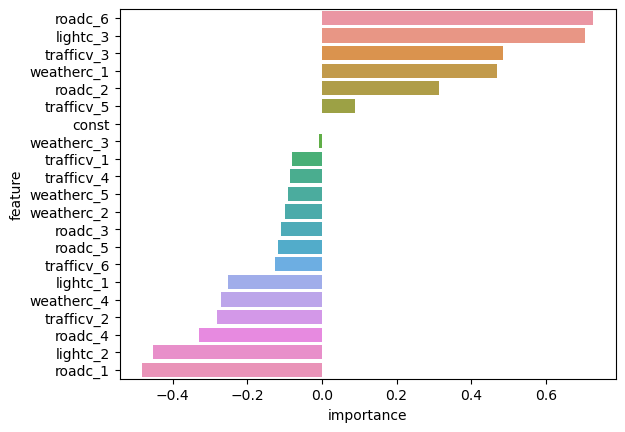

In [99]:
feature_name = list(X.columns.values.tolist())
importances = lf.coef_[0]
df_lf1 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_lf1.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_lf1['importances'], y = df_lf1['features'])
plt.xlabel('importance')
plt.ylabel('feature')

In [100]:
rf1 = RandomForestRegressor(n_estimators = 10, max_depth = 5, random_state = 2)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_rf1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_rf1))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_rf1))
print('Max Error:', metrics.max_error(y_test, y_pred_rf1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_rf1))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_rf1))
print('R^2:', metrics.r2_score(y_test, y_pred_rf1))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_rf1))

Mean Absolute Error (MAE): 0.3075816176085902
Mean Squared Error (MSE): 0.18737006985528792
Root Mean Squared Error (RMSE): 0.4328626454838624
Mean Absolute Percentage Error (MAPE): 531702248272196.56
Explained Variance Score: -0.03367183741510327
Max Error: 0.9540014168111977
Mean Squared Log Error: 0.08922728015617733
Median Absolute Error: 0.15321744763823106
R^2: -0.0626311832070725
Mean Poisson Deviance: 0.7567879955935034


Text(0, 0.5, 'feature')

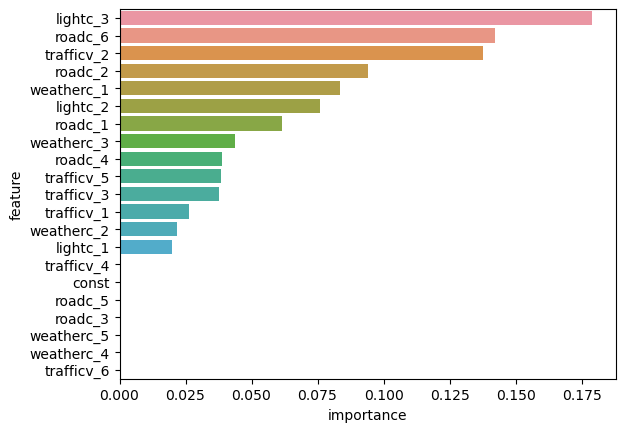

In [101]:
feature_name = list(X.columns.values.tolist())
importances = rf1.feature_importances_
df_rf1 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf1.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf1['importances'], y = df_rf1['features'])
plt.xlabel('importance')
plt.ylabel('feature')

##### Y2 FOR LV

In [102]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y2, test_size = 0.3, random_state = 3)

In [103]:
lf = LogisticRegression(random_state = 4)
lf.fit(X_train2, y_train2)
y_pred_lf2 = lf.predict(X_test2)

In [104]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred_lf2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred_lf2))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test2, y_pred_lf2, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred_lf2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test2, y_pred_lf2))
print('Max Error:', metrics.max_error(y_test2, y_pred_lf2))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test2, y_pred_lf2))
print('Median Absolute Error:', metrics.median_absolute_error(y_test2, y_pred_lf2))
print('R^2:', metrics.r2_score(y_test2, y_pred_lf2))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test2, y_pred_lf2))

Mean Absolute Error (MAE): 0.42857142857142855
Mean Squared Error (MSE): 0.44761904761904764
Root Mean Squared Error (RMSE): 0.6690433824641326
Mean Absolute Percentage Error (MAPE): 1329634175699860.8
Explained Variance Score: -2.220446049250313e-16
Max Error: 2
Mean Squared Log Error: 0.16521257040095647
Median Absolute Error: 0.0
R^2: -0.062204046491605824
Mean Poisson Deviance: 0.7034546514179623


Text(0, 0.5, 'feature')

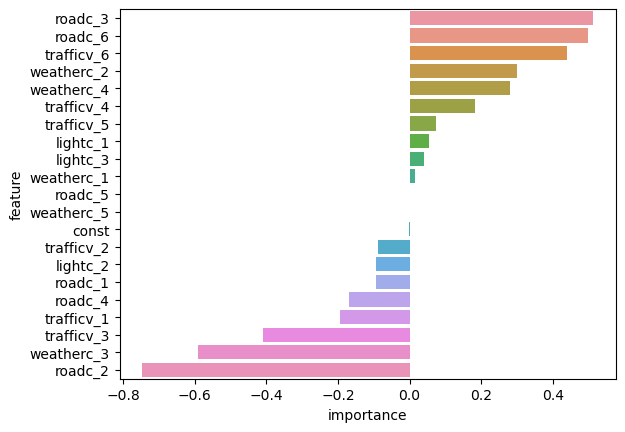

In [105]:
feature_name = list(X.columns.values.tolist())
importances = lf.coef_[0]
df_lf2 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_lf2.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_lf2['importances'], y = df_lf2['features'])
plt.xlabel('importance')
plt.ylabel('feature')

In [106]:
rf2 = RandomForestRegressor(n_estimators = 10, max_depth = 5, random_state = 5)
rf2.fit(X_train2, y_train2)
y_pred_rf2 = rf2.predict(X_test2)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred_rf2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred_rf2))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test2, y_pred_rf2, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred_rf2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test2, y_pred_rf2))
print('Max Error:', metrics.max_error(y_test2, y_pred_rf2))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test2, y_pred_rf2))
print('Median Absolute Error:', metrics.median_absolute_error(y_test2, y_pred_rf2))
print('R^2:', metrics.r2_score(y_test2, y_pred_rf2))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test2, y_pred_rf2))

Mean Absolute Error (MAE): 0.5301378723205993
Mean Squared Error (MSE): 0.442523455053335
Root Mean Squared Error (RMSE): 0.665224364446564
Mean Absolute Percentage Error (MAPE): 1038808246078589.5
Explained Variance Score: -0.038874980769818324
Max Error: 2.2344947410003853
Mean Squared Log Error: 0.1485882710852935
Median Absolute Error: 0.2695585368536546
R^2: -0.05011215926883761
Mean Poisson Deviance: 0.7057924277974187


Text(0, 0.5, 'feature')

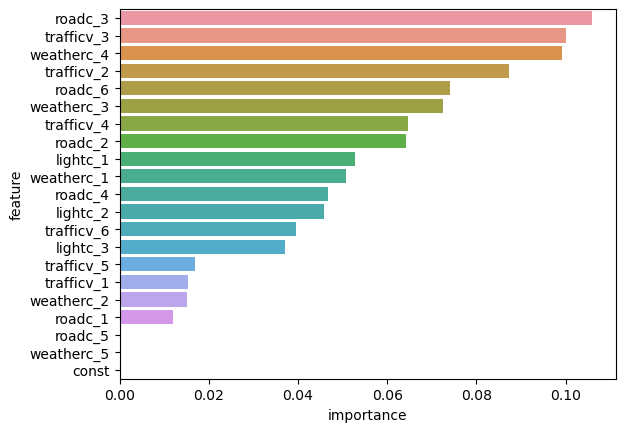

In [107]:
feature_name = list(X.columns.values.tolist())
importances = rf2.feature_importances_
df_rf2 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf2.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf2['importances'], y = df_rf2['features'])
plt.xlabel('importance')
plt.ylabel('feature')

##### Y3 FOR pd

In [108]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y3, test_size = 0.3, random_state = 6)

In [110]:
lf = LogisticRegression(random_state = 7)
lf.fit(X_train3, y_train3)
y_pred_lf3 = lf.predict(X_test3)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test3, y_pred_lf3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test3, y_pred_lf3))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test3, y_pred_lf3, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test3, y_pred_lf3))
print('Explained Variance Score:', metrics.explained_variance_score(y_test3, y_pred_lf3))
print('Max Error:', metrics.max_error(y_test3, y_pred_lf3))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test3, y_pred_lf3))
print('Median Absolute Error:', metrics.median_absolute_error(y_test3, y_pred_lf3))
print('R^2:', metrics.r2_score(y_test3, y_pred_lf3))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test3, y_pred_lf3))

Mean Absolute Error (MAE): 652.5333333333333
Mean Squared Error (MSE): 2276573.580952381
Root Mean Squared Error (RMSE): 1508.831859735332
Mean Absolute Percentage Error (MAPE): 0.49523809523809526
Explained Variance Score: 0.0
Max Error: 8500
Mean Squared Log Error: 20.878247987338963
Median Absolute Error: 0.0
R^2: -0.23006579423463625


Text(0, 0.5, 'feature')

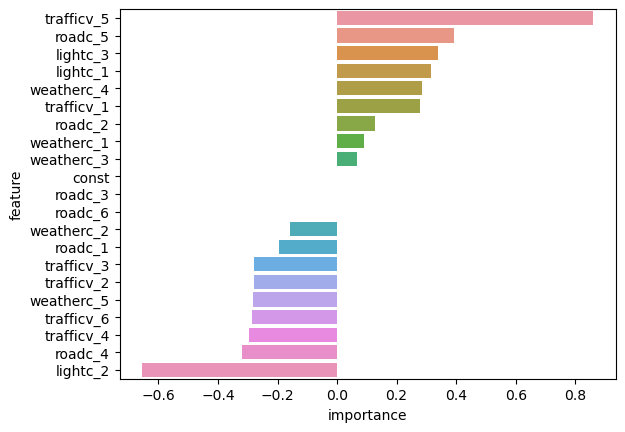

In [113]:
feature_name = list(X.columns.values.tolist())
importances = lf.coef_[0]
df_lf3 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_lf3.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_lf3['importances'], y = df_lf3['features'])
plt.xlabel('importance')
plt.ylabel('feature')

In [111]:
rf3 = RandomForestRegressor(n_estimators = 10, max_depth = 5, random_state = 7)
rf3.fit(X_train3, y_train3)
y_pred_rf3 = rf3.predict(X_test3)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test3, y_pred_rf3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test3, y_pred_rf3))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test3, y_pred_rf3, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test3, y_pred_rf3))
print('Explained Variance Score:', metrics.explained_variance_score(y_test3, y_pred_rf3))
print('Max Error:', metrics.max_error(y_test3, y_pred_rf3))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test3, y_pred_rf3))
print('Median Absolute Error:', metrics.median_absolute_error(y_test3, y_pred_rf3))
print('R^2:', metrics.r2_score(y_test3, y_pred_rf3))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test3, y_pred_rf3))

Mean Absolute Error (MAE): 1017.824894837412
Mean Squared Error (MSE): 4118565.895859105
Root Mean Squared Error (RMSE): 2029.425016072066
Mean Absolute Percentage Error (MAPE): 1.5775475585672963e+18
Explained Variance Score: -1.0961963944681812
Max Error: 17203.630952380954
Mean Squared Log Error: 20.72741229273391
Median Absolute Error: 665.06757545638
R^2: -1.225321014082164
Mean Poisson Deviance: 1680.3544504319816


Text(0, 0.5, 'feature')

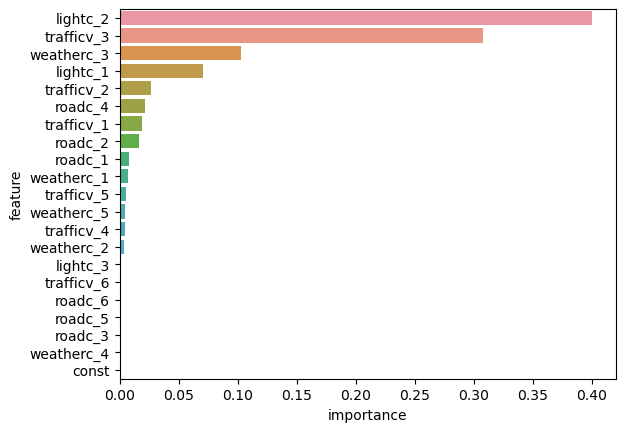

In [112]:
feature_name = list(X.columns.values.tolist())
importances = rf3.feature_importances_
df_rf3 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf3.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf3['importances'], y = df_rf3['features'])
plt.xlabel('importance')
plt.ylabel('feature')